# Silver per m2 Calculations

This journal documents the calculations and assumptions for the silver baseline file used in the calculator.

In [1]:
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 8)

density_Ag = 10.49 #g/cm3, source Wikipedia

From the ITRPVs, we have grams of Ag per cell from 2009 through 2019, with projections through 2030. While the standard cell size has changed in that time frame, it appears that cell size makes less of a difference than cell type (n-type vs p-type), therefore we will use this as contiguous average data.
Note: raw number extracted from ITRPV graphs with "webplotdigitizer"

### Some assumptions that will be made:

1) n-type cells account for only 5% of the world market share and have for the last decade. While these require more silver per cell than p-type, they make up a small portion of the marketshare and will therefore be ignored.

2) The difference in silver per cell between bifacial and monofacial cells is not significant for this calculation, and will therefore be averaged together.

In [2]:
#read in the csv of 2009 through 2030 data for silver per cell.
cwd = os.getcwd() #grabs current working directory
skipcols = ['Source']
itrpv_ag_gpc = pd.read_csv(cwd+"/../../PV_ICE/baselines/SupportingMaterial/ag_g_per_cell.csv", 
                           index_col='Year', usecols=lambda x: x not in skipcols)

Text(0, 0.5, 'Silver, grams/cell')

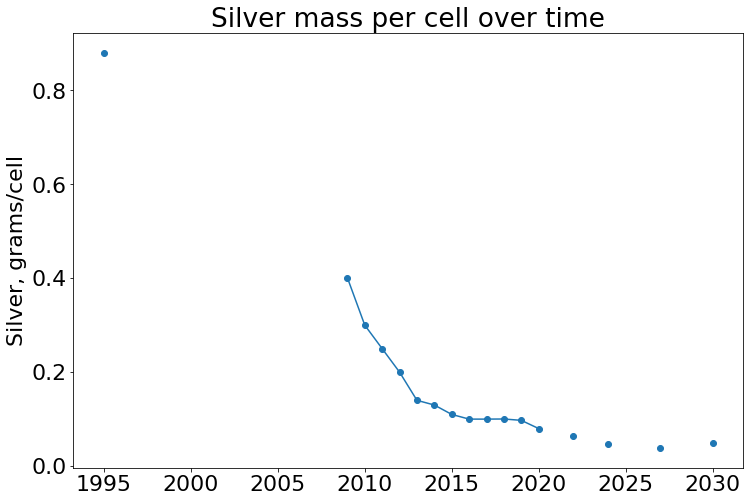

In [3]:
#plot the raw data
plt.plot(itrpv_ag_gpc, marker="o")
plt.title("Silver mass per cell over time")
plt.ylabel("Silver, grams/cell")

Based on looking at the plot of original data, it doesn't seem crazy to linearly interpolate for missing data

Text(0, 0.5, 'Silver, grams/cell')

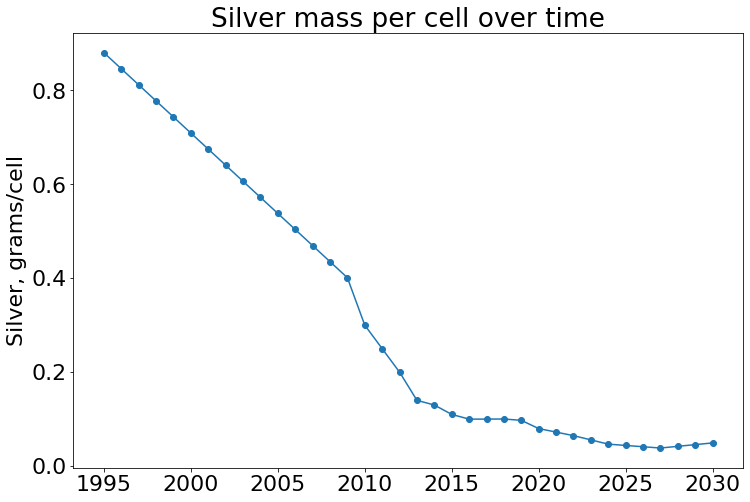

In [4]:
ag_gpc = itrpv_ag_gpc.interpolate()
plt.plot(ag_gpc, marker="o")
plt.title("Silver mass per cell over time")
plt.ylabel("Silver, grams/cell")

## Convert to a per module area basis (not per cell)

In [5]:
#import cell per m2 from the silicon baseline
cpm2 = pd.read_csv(cwd+"/../../PV_ICE/baselines/SupportingMaterial/output_cell_per_m2.csv",
                   index_col='Year', usecols=lambda x: x not in skipcols)
#print(cpm2)

Text(0, 0.5, 'Silver, grams/module m2')

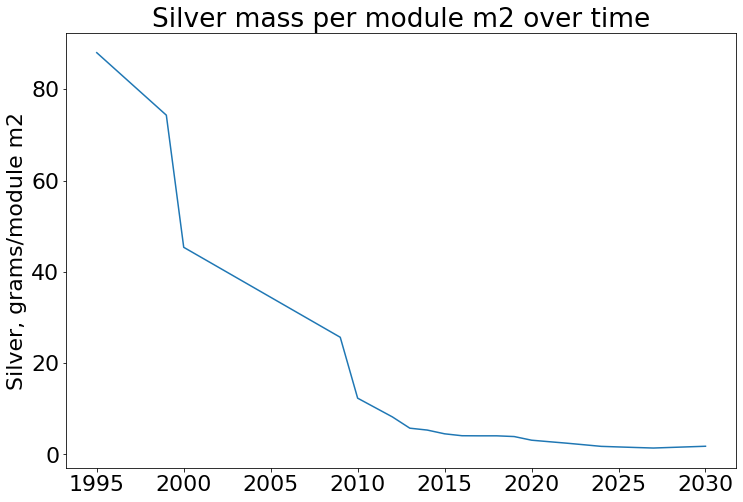

In [6]:
#convert silver per cell to silver per m^2 of module, based on output from silicon baseline
ag_gpc.columns = cpm2.columns = ['ag_g_per_m2'] #rename to a common name
ag_gpm2 = ag_gpc.mul(cpm2, 'columns') #multiply
plt.plot(ag_gpm2)
plt.title("Silver mass per module m2 over time")
plt.ylabel("Silver, grams/module m2")

### Extend projection through 2050
It appears that the silver per cell is expected to level out by 2025 or so. We will extend this projection through 2050 as a "lower limit" or minimal further improvement in this manufacturing technology

Text(0, 0.5, 'Silver, grams/module m2')

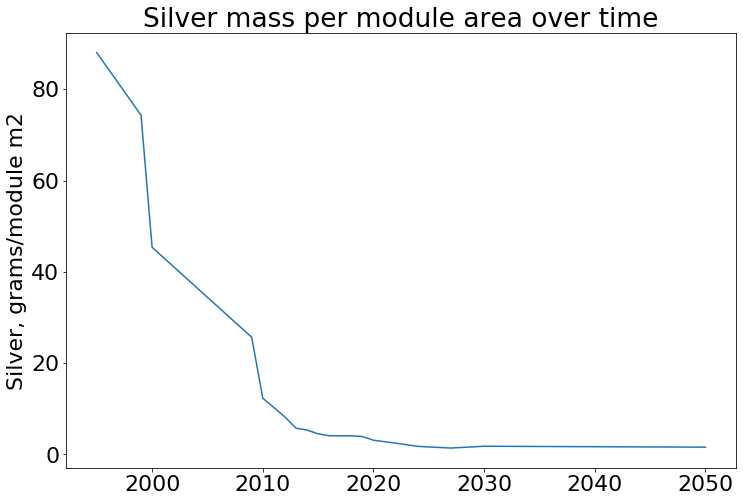

In [7]:
#create an empty df as a place holder
yrs = pd.Series(index=range(2031,2050), dtype='float64')
tempdf = pd.DataFrame(yrs, columns=['ag_g_per_m2'])

#take the average from 2025 through 2030, use that as lower limit projection 
avg = ag_gpm2.loc[2025:2030].mean() #this spits out a series, so need to access the the element and assign that to df
tempdf.loc[2050] = avg[0]
#print(tempdf)

#squish dataframes together
fulldf = pd.concat([ag_gpm2,tempdf])
ag_gpm2_full = fulldf.interpolate()
plt.plot(ag_gpm2_full)
plt.title("Silver mass per module area over time")
plt.ylabel("Silver, grams/module m2")

In [8]:
#print out to csv
ag_gpm2_full.to_csv(cwd+'/../../PV_ICE/baselines/SupportingMaterial/output_ag_g_per_m2.csv', index=True)